# This Project is about building a model to classify diabetic, non-diabetic, and pre-diabetic

data was gethered from https://www.kaggle.com/datasets/yasserhessein/multiclass-diabetes-dataset

In this data set the labels are 0 for non-diabetic, 1 for diabetic, and 2 for predict-diabetic

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Multiclass Diabetes Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


In [4]:
df.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856,1.121212
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652,0.914857
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000,1.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000,2.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000,2.000000


Gender is classified as 0 for female and 1 for male. All other variables are numeric, with HbA1c being a key indicator that should be visible in our models.

In [5]:
df[['Gender', 'Class']] = df[['Gender', 'Class']].astype('category')

In [6]:
df['Class'].value_counts()

Class
2    128
0     96
1     40
Name: count, dtype: int64

classes are 

C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and 

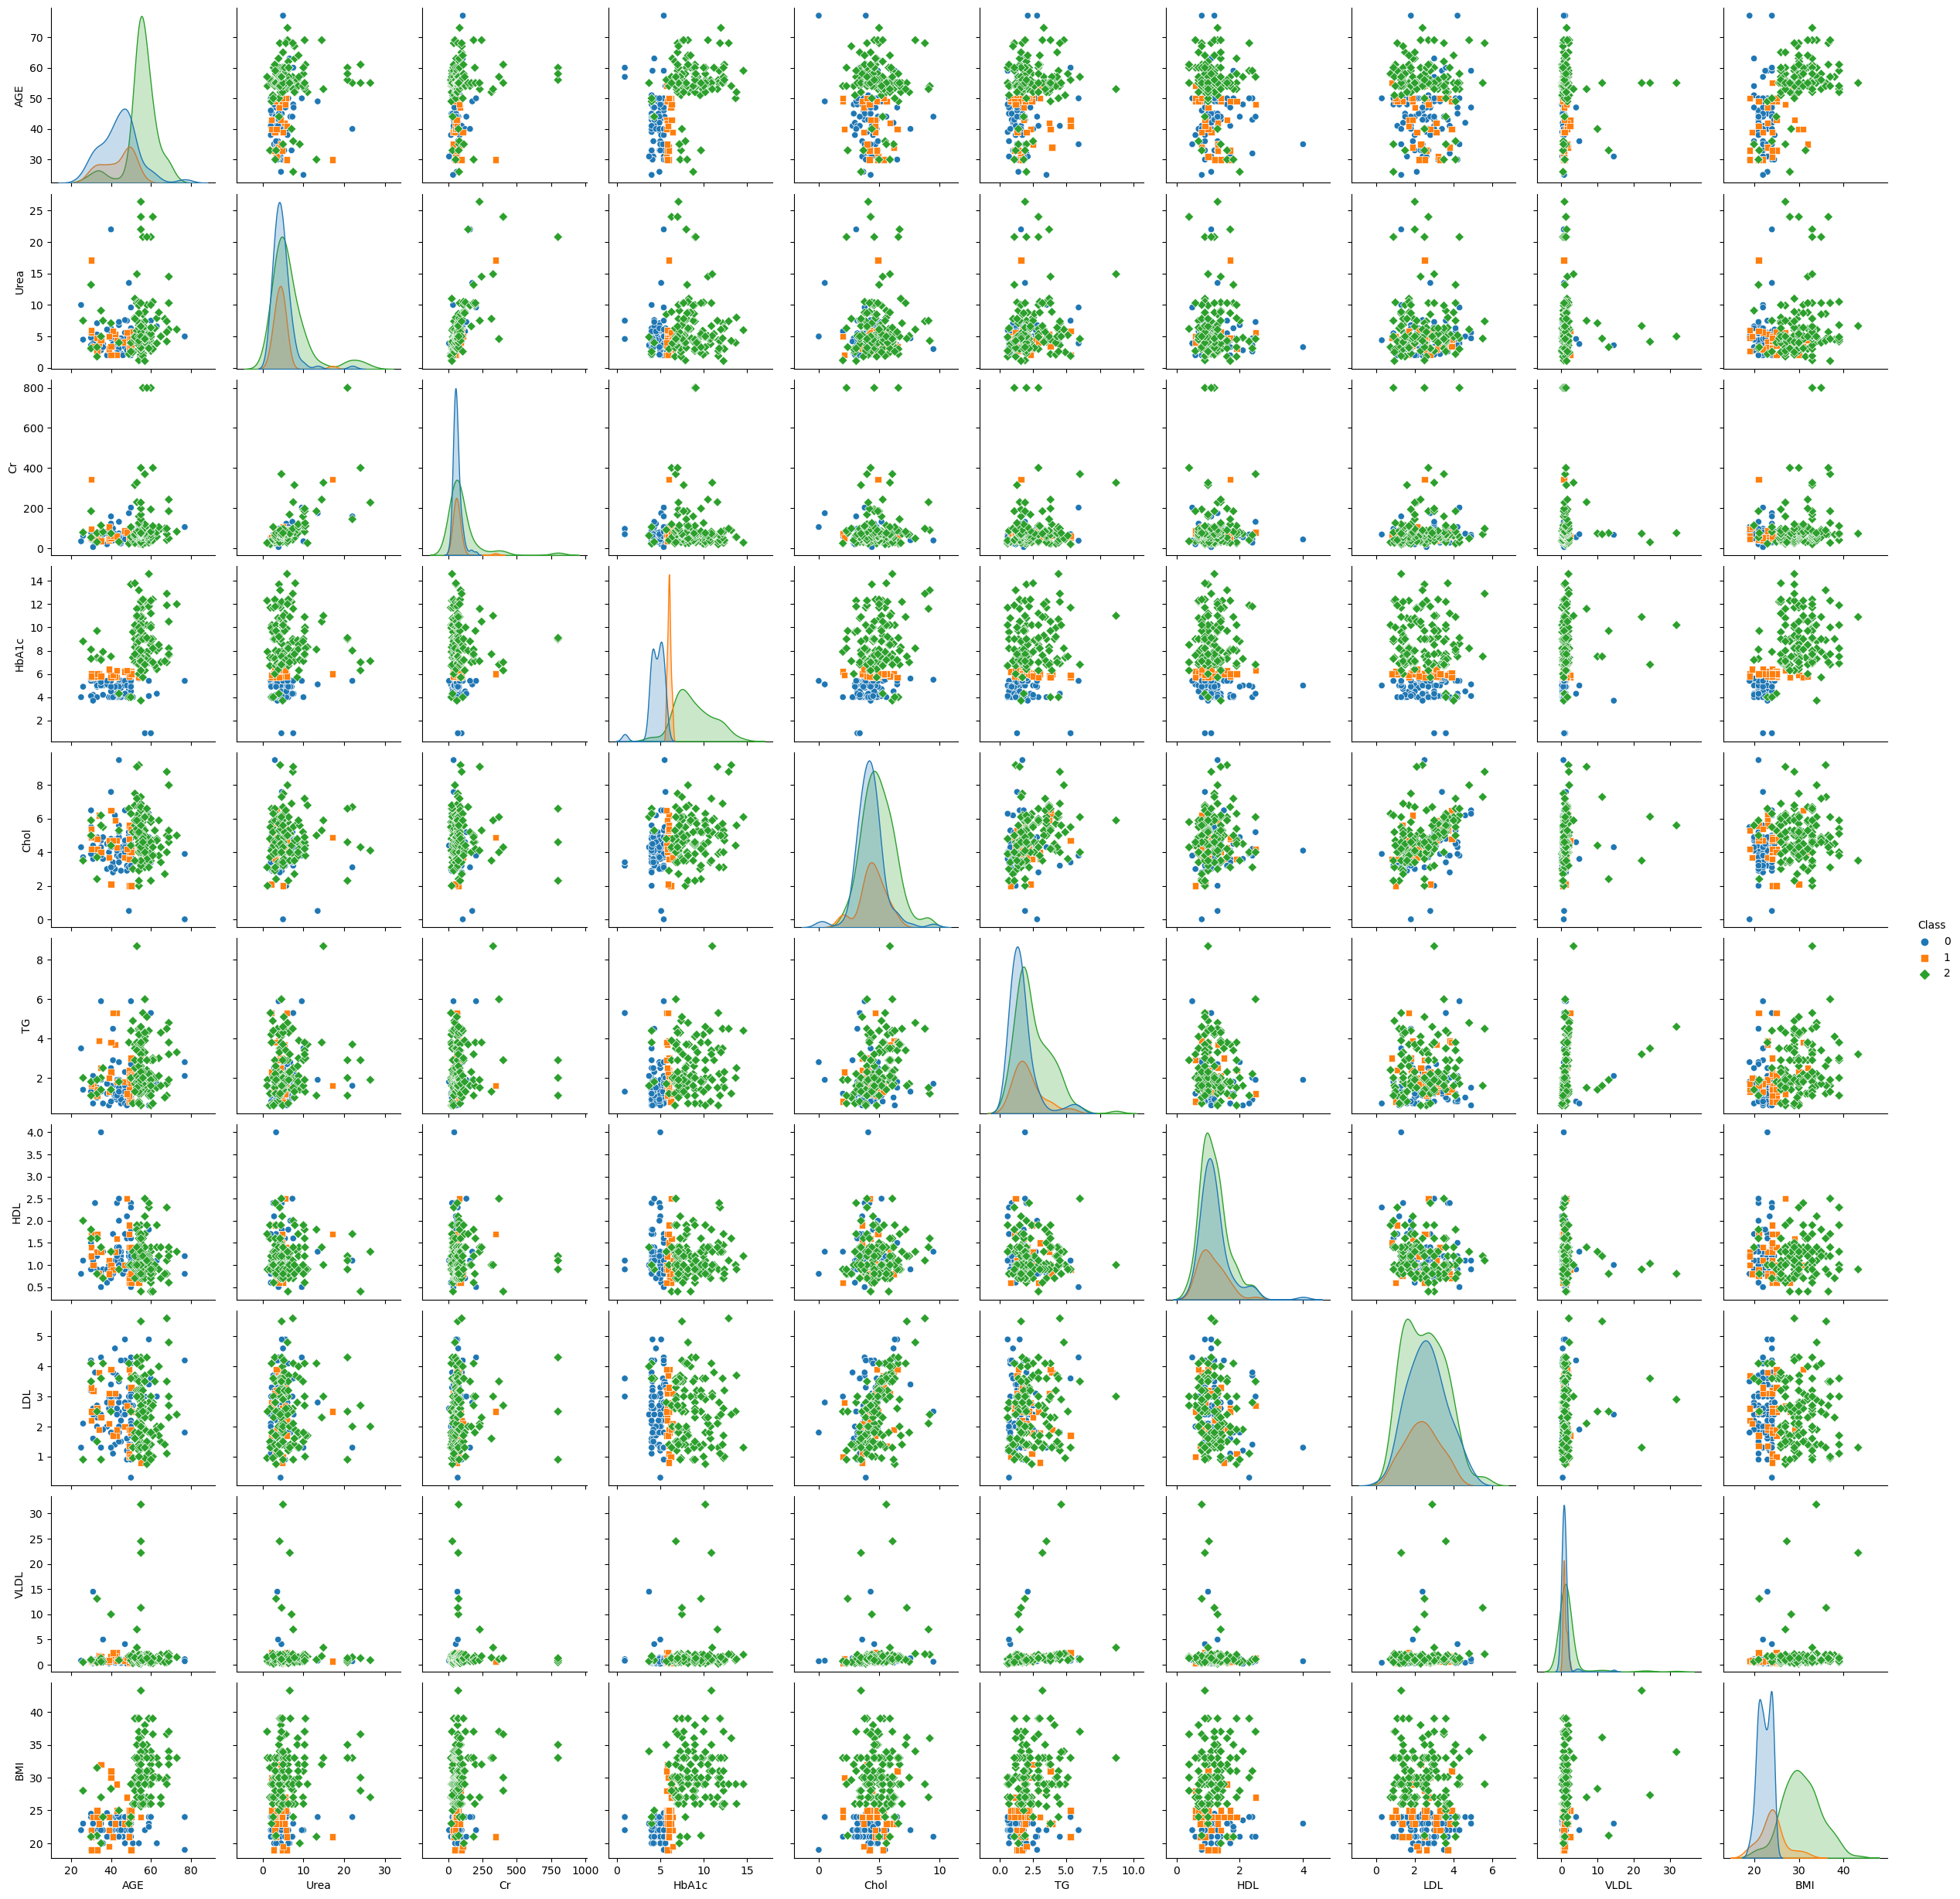

In [7]:
sns.pairplot(df, hue='Class', markers = ['o', 's', 'D'])
plt.show()

One key standouts are that predict diabetic look to have a higher average BMI than the other two classes.

C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


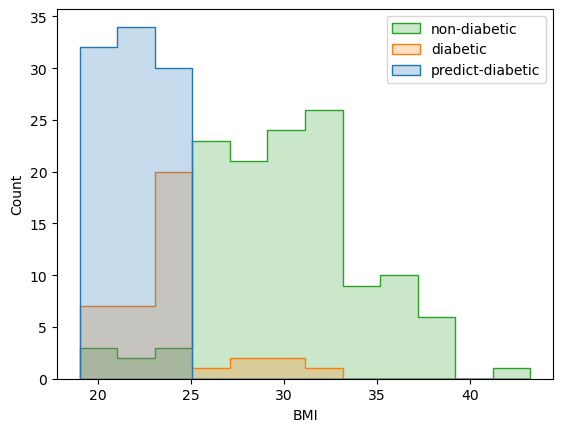

In [8]:
labels = ['non-diabetic', 'diabetic', 'predict-diabetic']

sns.histplot(df, x='BMI', hue = 'Class', element='step')
plt.legend(labels = labels)
plt.show()

In [9]:
df.groupby('Class')['BMI'].mean()

C:\Users\Kevin\AppData\Local\Temp\ipykernel_4904\1028428544.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Class')['BMI'].mean()


Class
0    22.350000
1    24.112500
2    30.620234
Name: BMI, dtype: float64

Taking a look at HbA1c, or glycated hemoglobin, it looks to have separated the data as well.

C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


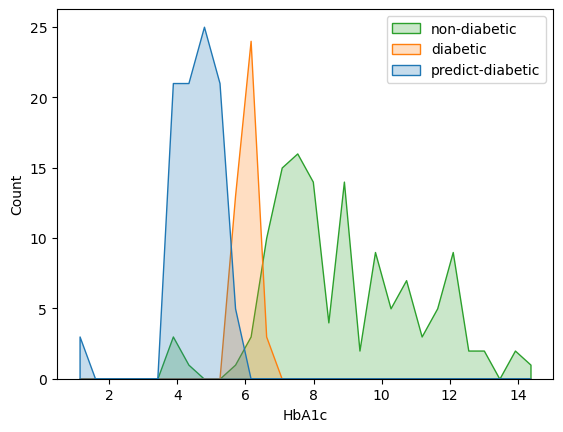

In [10]:
sns.histplot(df, x='HbA1c', hue = 'Class', element='poly', bins = 30)
plt.legend(labels = labels)
plt.show()

It looks like higher HbA1c percentages are correlated with non-diabetic, whereas a percentage of around 6-6.5 is correlated with diabetes and lower than that is predict-diabetic.

The last easily discernable relationship from the pairplot is age.

C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


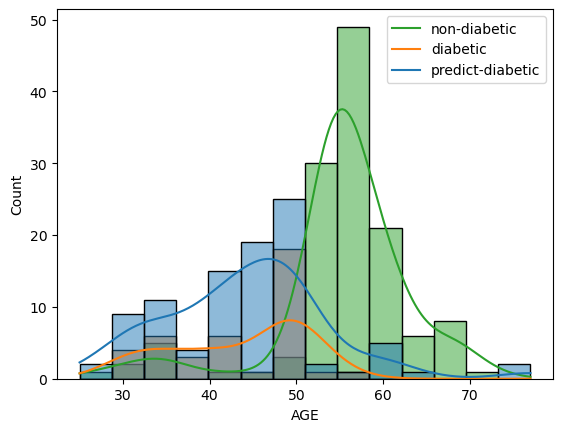

In [11]:
sns.histplot(df, x='AGE', hue = 'Class', kde = True)
plt.legend(labels = labels)
plt.show()

Non-diabetic appears more frequently in older subjects, while diabetic and predict-diabetic follow a similar distribution around lower ages.

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Class'])
y = np.array(df['Class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)

Stratify according to y because there is a large class imbalance.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
rfc = Pipeline([
    ('standard scaler', StandardScaler()), ("random forest classifier", RandomForestClassifier())
])

rfc.fit(X_train, y_train)

Pipeline(steps=[('standard scaler', StandardScaler()),
                ('random forest classifier', RandomForestClassifier())])

In [14]:
rfc.score(X_train, y_train)

1.0

In [15]:
rfc.score(X_test, y_test)

0.9625

In [16]:
y_pred = rfc.predict(X_test)

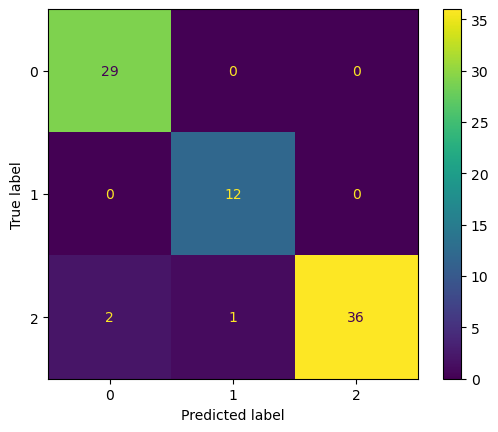

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

Just using a random forest classifier without altering any hyperparameters gives a training accuracy of 100% and a test accuracy of 97.5%. From the confusion matrix we can see that three incorrectly predicted labels were predicted diabetics labeled as non-diabetic and diabetic.It might be worth considering change our metric of evaluation to reduce this kind of error, as we would rather have subjects who were pre-diabetic know that they are.

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline([
    ('standard scaler', StandardScaler()), ("k-nearest neighbors", KNeighborsClassifier(n_neighbors=9))
])

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8125

In [40]:
knn_unscaled = KNeighborsClassifier(n_neighbors=9)
knn_unscaled.fit(X_train, y_train)
knn_unscaled.score(X_test, y_test)

0.725

scaling helped model performance, but a random forest classifier has much better performance.

In [25]:
from sklearn.model_selection import GridSearchCV

knn_grid = Pipeline([
    ('standard scaler', StandardScaler()), ("k-nearest neighbors", KNeighborsClassifier())
])

param_grid = [
    {
        'k-nearest neighbors__n_neighbors': [3,5,7,9,11]
    }
]
grid = GridSearchCV(knn_grid, param_grid, )
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standard scaler', StandardScaler()),
                                       ('k-nearest neighbors',
                                        KNeighborsClassifier())]),
             param_grid=[{'k-nearest neighbors__n_neighbors': [3, 5, 7, 9,
                                                               11]}])

In [26]:
grid.best_params_

{'k-nearest neighbors__n_neighbors': 3}

In [27]:
grid.best_score_

0.8043543543543544

In [31]:
grid.score(X_test, y_test)

0.85

Using grid search cross validation picked a better number of neighbors than our original guess of 9, likely because the higher number of neighbors picked earlier was oversimplifying our model.